# Физика. Лабораторная работа 1.01. Тимофеев Н.А.

### Импорт необходимых модулей и загрузка данных

In [1]:
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import interp1d

import pprint
import math

pp = pprint.PrettyPrinter(width=70, compact=True)

In [2]:
data = {"t": [
            9.89,9.60,9.80,9.57,10.04,10.00,9.38,9.17,9.83,10.88,10.55,
            9.88,10.17,10.00,11.05,10.02,10.17,10.30,9.97,9.85,9.89,10.39,
            10.34,9.99,10.25,10.07,9.83,9.65,9.83,9.92,9.90,10.25,9.87,10.02,
            9.88,9.48,10.09,9.92,9.92,10.04,9.95,10.05,9.82,10.20,9.81,9.96,9.38,10.11,10.00,10.20
        ]}

### Проверка введенных данных

In [3]:
N = len(data["t"])
t_max, t_min = max(data["t"]), min(data["t"])
t_mean = round(stat.mean(data["t"]), 2)

print(f"Длина тестового набора данных: {N}")
print(f"Результаты замеров лежат на интервале: [{t_min},{t_max}]")
print(f"Среднее значение: {t_mean}")

Длина тестового набора данных: 50
Результаты замеров лежат на интервале: [9.17,11.05]
Среднее значение: 9.98


### Рассчитываем необходимые величины в табл. 1

In [4]:
data["t"] = sorted(data["t"])
null = data.setdefault("t_i_min_mean", [])
null = data.setdefault("t_i_min_mean_sq", [])

In [5]:
# Заполнение столбца t_i - t_mean
for t_i in data["t"]:
    data["t_i_min_mean"].append(round(t_i - t_mean, 2))

tmp = round(sum(data["t_i_min_mean"]))
print(f"Сумма значений столбца t_i - t_mean: { tmp }")

Сумма значений столбца t_i - t_mean: 0


In [6]:
# Заполнение столбца (t_i - t_mean)^2
for t_i in data["t_i_min_mean"]:
    data["t_i_min_mean_sq"].append(round(t_i ** 2, 2))

### Итоговый результат заполнения табл. 1

In [7]:
𝜎_N = round(math.sqrt((1 / (N - 1)) * sum(data["t_i_min_mean_sq"])), 2)
𝜌_max = round(1 / (𝜎_N * math.sqrt(2 * math.pi)), 2)

### Заполнение табл. 2

In [8]:
data_second = {"intr": (
    (9.2, 9.45), (9.46, 9.71), (9.72, 9.97), (9.98, 10.23), (10.24, 10.49), (10.5, 10.75), (10.76, 11.01)),
              }

In [9]:
null = data_second.setdefault("ΔN", [])
null = data_second.setdefault("ΔN_NΔT", [])
null = data_second.setdefault("t", [])
null = data_second.setdefault("𝜌", [])

In [10]:
for start, end in data_second["intr"]:
    data_second["t"].append(round(stat.mean([start, end]), 2))
    cnt = 0
    for t in data["t"]:
        if (start < t or math.isclose(start, t)) and (math.isclose(end, t) or t < end):
            cnt += 1
    data_second["ΔN"].append(cnt)

# Из-за ошибок округления (и сравнения чисел типа float) добавим значения, которые не попали в промежуток
data_second["ΔN"][0] += 1
data_second["ΔN"][-1] += 1

In [11]:
ΔT = round((t_max - t_min) / 7, 2)

print(f" ΔT = {ΔT}")

 ΔT = 0.27


In [12]:
for i in data_second["ΔN"]:
    data_second["ΔN_NΔT"].append(round(i /(N*ΔT), 2))

In [13]:
def 𝜌(t):
    return 𝜌_max * math.exp(-(((t-t_mean) ** 2) / (2*(𝜎_N) ** 2)))

In [14]:
for i in data_second["t"]:
    data_second["𝜌"].append(round(𝜌(i), 2))

### Результаты заполнения табл. 1 и табл 2.

In [15]:
print("Таблица 1")
pp.pprint(data)
print(f"Вычисления в подвале табл.1: 𝜎_N={𝜎_N}, 𝜌_max={𝜌_max}")

print("\nТаблица 2")
pp.pprint(data_second)

Таблица 1
{'t': [9.17, 9.38, 9.38, 9.48, 9.57, 9.6, 9.65, 9.8, 9.81, 9.82, 9.83,
       9.83, 9.83, 9.85, 9.87, 9.88, 9.88, 9.89, 9.89, 9.9, 9.92,
       9.92, 9.92, 9.95, 9.96, 9.97, 9.99, 10.0, 10.0, 10.0, 10.02,
       10.02, 10.04, 10.04, 10.05, 10.07, 10.09, 10.11, 10.17, 10.17,
       10.2, 10.2, 10.25, 10.25, 10.3, 10.34, 10.39, 10.55, 10.88,
       11.05],
 't_i_min_mean': [-0.81, -0.6, -0.6, -0.5, -0.41, -0.38, -0.33, -0.18,
                  -0.17, -0.16, -0.15, -0.15, -0.15, -0.13, -0.11,
                  -0.1, -0.1, -0.09, -0.09, -0.08, -0.06, -0.06,
                  -0.06, -0.03, -0.02, -0.01, 0.01, 0.02, 0.02, 0.02,
                  0.04, 0.04, 0.06, 0.06, 0.07, 0.09, 0.11, 0.13,
                  0.19, 0.19, 0.22, 0.22, 0.27, 0.27, 0.32, 0.36,
                  0.41, 0.57, 0.9, 1.07],
 't_i_min_mean_sq': [0.66, 0.36, 0.36, 0.25, 0.17, 0.14, 0.11, 0.03,
                     0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01,
                     0.01, 0.01, 0.01, 0.01, 0.0

## Построение графика

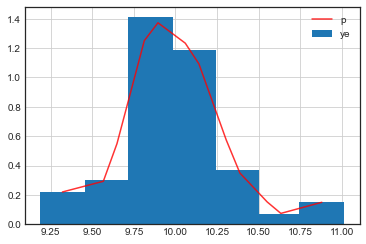

In [16]:
plt.style.use('seaborn-white')

_x = np.asarray(data_second["t"])
_y = np.asarray(data_second["ΔN_NΔT"])
_p = np.asarray(data_second["𝜌"])

plt.grid()

plt.bar(_x, _y, label="ye",width=0.27, alpha=1)

f = interp1d(_x, _y, kind="linear")
x_int = np.linspace(_x[0],_x[-1], 20)
y_int = f(x_int)

plt.plot(x_int, y_int, label="p",alpha=0.8, color="r")

plt.legend()

plt.show()